# **K-means Clustering**

Auther: Tassawar Abbas\
Email:  abbas829@gmail.com\
github: https://www.kaggle.com/abbas829\
kaggle: https://www.kaggle.com/abbas829

# Understanding K-Means Clustering in Python

Clustering is a fundamental technique in unsupervised learning, where data points are grouped together based on their similarities. One of the most popular clustering algorithms is K-Means. In this blog post, we'll delve into the workings of K-Means clustering, its benefits, and how to implement it in Python.

## What is K-Means Clustering?

K-Means is a partition-based clustering algorithm that aims to partition *n* observations into *k* clusters, where each observation belongs to the cluster with the nearest mean. The "means" here refer to the centroids of the clusters. The algorithm iteratively assigns each data point to the nearest centroid and then recalculates the centroids until convergence.

## How Does K-Means Work?

1. **Initialization**: Choose *k* initial centroids randomly from the data points.
2. **Assignment**: Assign each data point to the nearest centroid, forming *k* clusters.
3. **Update**: Recalculate the centroids of the clusters based on the mean of the data points assigned to each cluster.
4. **Convergence**: Repeat steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

## Benefits of K-Means Clustering

### 1. Simplicity:
    - K-Means is easy to understand and implement, making it suitable for large datasets.
### 2. Scalability:
    - It can efficiently handle large datasets with a moderate number of clusters.
### 3. Interpretability:
    - The clusters formed by K-Means are easy to interpret, as each data point is assigned to the nearest centroid.

## Implementing K-Means Clustering in Python

Let's implement K-Means clustering using the popular machine learning library, scikit-learn.

```python
from sklearn.cluster import KMeans
import numpy as np

# Generate sample data
X = np.random.rand(100, 2)

# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_


## **Example**

### Import libraries

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load diamond dataset

In [2]:
df = sns.load_dataset('diamonds')
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [3]:
# feature column
X = df[['price', 'carat']]

In [4]:
# Intialize the Kmean model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [5]:
# Get the cluster labels
labels = kmeans.labels_

In [6]:
# make labels culuster column
df['labels'] = labels

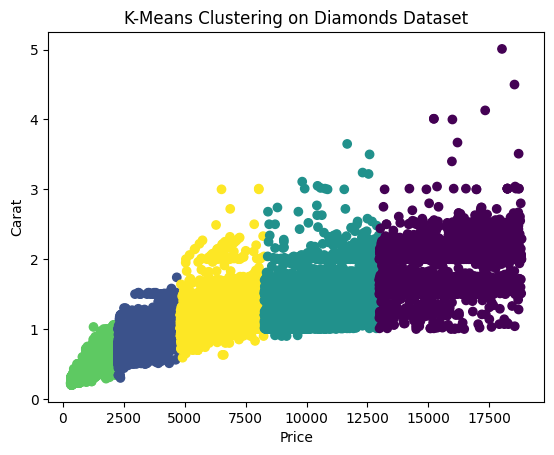

In [7]:

# scatter plot on the base of colour as culster 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

<Axes: xlabel='labels', ylabel='price'>

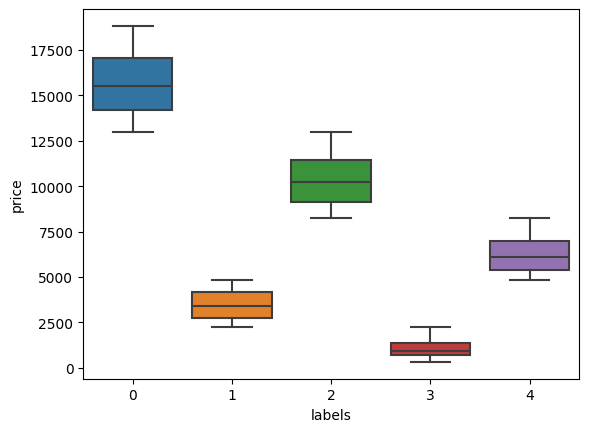

In [8]:
sns.boxplot(x='labels', y='price', data=df)

In [9]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       3
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       3
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       3
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       3
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       3

In [58]:
df.labels.unique()

array([0, 2, 3, 1, 4])

# lets change the number of clusters

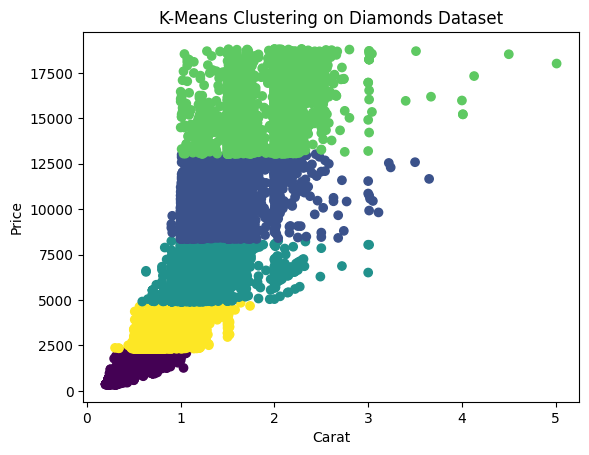

In [13]:
X = df[["carat", "price", "cut", "color", "clarity"]]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels'] = labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# Make a parallel coordinate plot using plotly express

In [16]:
import plotly.express as px
fig = px.parallel_coordinates(df, color="labels")
fig.show() 

# **Model Evaluation** 
### 1. **Elbow Method**

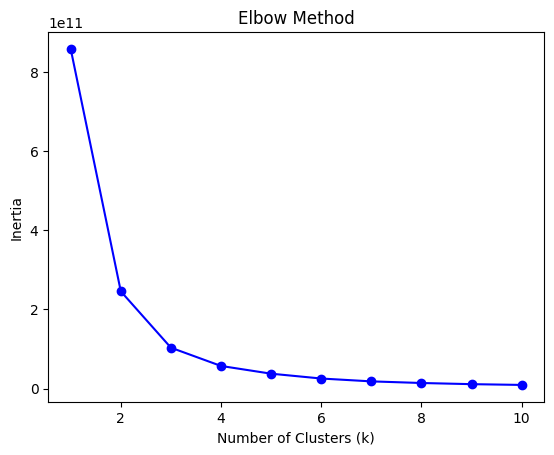

In [17]:

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()